# Sudden head change at $x=0$

IHE, Delft, Transient Groundwater

Exercises in class, 2012-01-07

@T.N.Olsthoorn

[dddk](fielname)

## Loading modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc  # scipy.special has numerous special mathematical functions

### Some exercises in naive plotting, but it works well

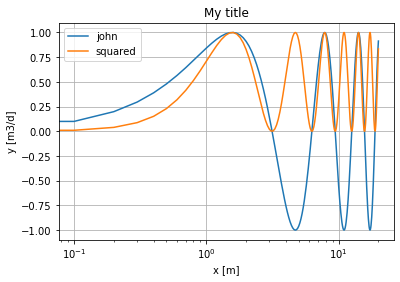

In [3]:
x = np.linspace(0, 20, 201)  # generate an array with 201 numbers between and including 0 and 20
y = np.sin(x)  # computed the sin of these x-values
plt.plot(x, y, label='john') # plot a line and give the line the label "john"
plt.plot(x, y**2, label='squared') # plot another line and give this line the label "squared"
plt.title('My title') # put a title on the top of the axes
plt.xlabel('x [m]') # put a label at the x-axis
plt.ylabel('y [m3/d]') # put a label at the y-axis
plt.grid() # toggle the gridlines on (plt.grid(True) sets it, plt.grid(False) removes the lines)
plt.xscale('log') # use logarithmic scale for the x-axis
plt.legend() # add a legend, which uses the labels specified for the lines

In [83]:
z = np.zeros_like(x)  # generate an array of zeros, the array has exactly the same size as the x-array
x.shape # show the size of the x-array (should be (201,) as it has no orientation and contains 201 values)

(201,)

### Excersize with some formatted printing

In [84]:
A, B, C = 123.45, 356789.1234, np.pi * 4 # assign values to the new veriables A, B and C


print('This is the old way of specifying the variable to insert in a string and to format them:')
print(A, B, C) # print them, without any formatting
print('A = {} m2/d, B = {} l/h, c = {} [-]'.format(A, B, C)) # print them within a string, replacing {}
# this is done by applying the method 'format(...)' to the string object. This method, takes the variables and
# puts them in the string at in the place of the successive braces {}. To format these variables in any desired
# way, you have to specify the formatting within the braces as is done below

print('A = {:.4g} m2/d, B = {:.2f} l/h, c = {:.3e} [-]'.format(A, B, C))
# Here each variable will be formatted as specified within each of the braces sets. .4g is general format with
# four significant digits, :.2f is floating point with two decimals and .3e is scientific
# with 3 significant didgets.

print('A = {:.4g} m2/d, B = {:20.2f} l/h, c = {:.3e} [-]'.format(A, B, C))
# The number in front of the accuracy didget is the field width. Here, the second variable will be
# printed in a field of 20 blanks as a floating point number with 2 decimals

print('A = {0:.4g} m2/d, B = {2:20.2f} l/h, c = {1:.3e} [-]'.format(A, B, C))
# A value in front of the colon (:) is the index of the variable. In this case 0 is the first
# variable (A), 2 is the third (C) and 1 is the second(B). So using these indices allows the
# the order in which the variables are inserted into the string to differ from the order in the format string.

print('A = {0:.4g} m2/d, C = {2:20.2f} l/h, B = {1:.3e} A = {0:.3f}, C={2:.3g} [-]'.format(A, B, C))
# Here the index is used more than once, this is also allowed if you want to use a variable
# more than once in a string.

# Now the most mordern way of inserting variable in a string and formatting them.
# Instead of the format(...) method, you tell he string that insertions are to be made.
# You do that by placing an f (formatted string) in front of the string like so f'str {}'
n = 4
print(f'\nWhat now follows are {n} fstrings, this is the most modern way:') # \n generates a new line, see result
print(f'A = {C} m2/d, B = {A} l/h, c = {B} [-]')

print(f'A = {A:.4g} m2/d, B = {B:.2f} l/h, c = {C:.3e} [-]')
# With f-strings, you can put the variables right within the braces in front of the colon or
# even without a colon, if you just want to print them without specific formatting.

print(f'A = {C:.4g} m2/d, B = {A:.2f} l/h, c = {B:.3e} [-]')
# As you can see, the formatting works exactly the same as with the .format(...) method. The only
# difference is that the variables themselves are now directly placed within the { }



This is the old way of specifying the variable to insert in a string and to format them:
123.45 356789.1234 12.566370614359172
A = 123.45 m2/d, B = 356789.1234 l/h, c = 12.566370614359172 [-]
A = 123.5 m2/d, B = 356789.12 l/h, c = 1.257e+01 [-]
A = 123.5 m2/d, B =            356789.12 l/h, c = 1.257e+01 [-]
A = 123.5 m2/d, B =                12.57 l/h, c = 3.568e+05 [-]
A = 123.5 m2/d, C =                12.57 l/h, B = 3.568e+05 A = 123.450, C=12.6 [-]

What now follows are 4 fstrings, this is the most modern way:
A = 12.566370614359172 m2/d, B = 123.45 l/h, c = 356789.1234 [-]
A = 123.5 m2/d, B = 356789.12 l/h, c = 1.257e+01 [-]
A = 12.57 m2/d, B = 123.45 l/h, c = 3.568e+05 [-]


## First some basic array indexing to select array values

In [85]:
u = np.linspace(0, 5, 501)[1:]
# generates 510 values between 0 and 5 and select number 1 (=the second value) till the last
# So this yields 500 values. The firs one is let out because we don't want the 0 for later.

# basic indexing of array
#u(2:end) # the matlab way. Matlab arrays start at index 1, and indexing is with brackes ()
#u[1:] # the python way, whith []. Python arrays start at 0, so from 1 (= the second till the end)
#u[:-1] # The python way to select all values except the last
#u[20:30] # select values with index 20-30 that is 20, 21, .... 29 (not 30). u[20] is the 21 value (because 0 is the first)
#u[10:100:5] # Select values of u with index 10:100 with steps of 5, so 10, 15, 20, 25 ... 95 (100 is not included)
#u[:10] # Select u-values 0, 1, 2 , .., 9 (10 is not inlcluded)

#u = np.arange(0, 10)  # the generates "a range" with values 0, 1,... 8, 9 (not 10)
#u = np.linspace(0, 10, 3) # likewise generates a range with values 0, 3, 6, 9

#u[0] # first u-value
#u[2] # third u-value

## The complementary error function

got it from scipy.special (see above from scipy.special import erfc)

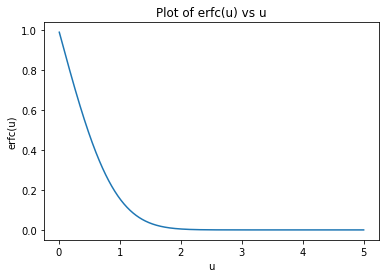

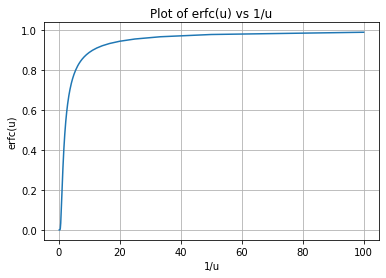

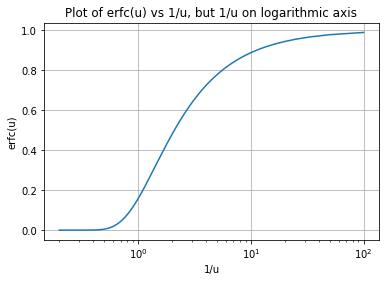

In [86]:
y = erfc(u) # we already have the u-values, now compute the corresponding erfc(u) values
plt.plot(u, y) # plot y vs u
plt.xlabel('u') # add label to the x-axis
plt.ylabel('erfc(u)')
plt.title('Plot of erfc(u) vs u')
plt.show() # finish and show the plot

plt.plot(1/u, y) # now plot y vs 1/u
plt.xlabel('1/u') # add label to x-axis
plt.ylabel('erfc(u)')
plt.grid() # Toggles gridlines on
plt.title('Plot of erfc(u) vs 1/u')
plt.show() # finish and show the plot

plt.plot(1/u, y)  # again, plot y vs 1/u
plt.xlabel('1/u') # put xlabel
plt.ylabel('erfc(u)')
plt.xscale('log') # make x-axis logarithmic
plt.title('Plot of erfc(u) vs 1/u, but 1/u on logarithmic axis')
plt.grid(True) # add grid lines
plt.show() # finish and show the plot

# Booleans (True or False) and logical indexing to select values from an array

In [87]:
4 == 4 # this is an expression, its outcome is True (True is an object, like is False)

True

In [88]:
4 > 4 # this is obviously False

False

In [1]:
# If y is an array, then y > 0.6 is a boolean array, i.e. an array with the same size as y but with only
# values True or False
# We already have an array y
# So here we make all the values of y that are larger than 0.6 equal to 0.6
y[y > 0.6] = 0.6
plt.plot(1/u, y)
plt.xscale('log')
plt.grid()
plt.ylim((0, 1))

NameError: name 'y' is not defined

## Superposition

The effect of a sudden change by an amount A [m] of the river stage at $x=0$ and $t=0$ is given by

$$s(x, t) = A \, \mbox{erfc}(u), \,\,\, \mbox{where} \,\, u = \sqrt{\frac{x^2 S}{4 kD t}}$$

Given a series of change times $t_{ci}$ and corrseponding sudden changes $\delta A_i$, we can super impose the effect of the individual changes to get the total effect of the varying river stage on the groundwater head (and discharge)

$$ s(x, t) = \sum_{i=0}^n \left( \delta A_i \, \mbox{erfc} \sqrt{\frac{x^2 S}{4 kD (t - t_{ci})}}\,\right),\,\,\,\, t > t_{ci}$$

This is demonstrated below.

A  = [2.  1.5 1.3 2.6 3.1 0.5 2. ]
dA = [ 2.  -0.5 -0.2  1.3  0.5 -2.6  1.5]


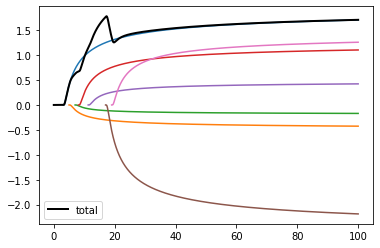

In [94]:
# The aquifer properties
kD = 600 # m2/d
S = 0.1 # [-]
x = 200. # m, the value of x for which we wand the graph

# The array of times at which we want the head to be computed
t = np.linspace(0, 100, 10001)

# The list of change times (you can make it an array if you wish but it's not necessary here)
tc = [3, 5, 7, 8.1, 11.3, 17, 19] # d, change times

# The river stage values. Each value is valid from its change time till the next change time
A  = np.array([2, 1.5, 1.3, 2.6, 3.1, 0.5, 2.0]) # m, stage of the river (it must be an array)

# Compute the changes of the river stage from the stage itself
#dA = np.hstack((0, A)) # take the array A and put a 0 in front of it
#dA = dA[1:] - dA[:-1]  # take value A[i+1] - A[i]
dA = np.diff(np.hstack((0, A))) # this is the most efficient and proper way to compute the stage changers
print('A  =', A) # show the array of stage values
print('dA =', dA) # show the array of stage-change values


# Now we're all set to do the superposition
s = np.zeros_like(t) # initialize the heads with all zeros (size of s is the same as size of t)

# put dA and tc next to each other (using the zip function)
# Then loop over them, while yielding the next value of dA and tc from the arrays
# and call them dAi and tci respectively
for dAi, tci in zip(dA, tc):
    # Compute the u for this change time tci.
    # Use logical indexiing t > tci to select only the times that are larger than the current change time
    ui = np.sqrt(x ** 2 * S / (4 * kD * (t[t > tci] - tci)))
    
    # Compute the head change due to this stage change dAi and change time tci only
    ds = dAi * erfc(ui)
    #s[t > tci] = s[t > tci] + ds # This is also good, but using += below (add to yourself) is more elegant
    s[t > tci] += ds # Add this to the total s-array (this is the superposition) (only at locations were t > tci)
    plt.plot(t[t > tci], ds) # plot contribution of this head change from this tci

# After the loop, when all change times have been processed and results of each individual head change 
# was added to the head-change array s, plot it, to see the overall result
plt.plot(t, s, 'k', lw=2, label='total')
plt.legend()
plt.show()  # finish and show graph (you don't strictly need it, but it's the proper way to finish a graph)

# If you "out-comment" line 38, by placing # in front, you only get the total end result

In [ ]:
'aant to change'